In [1]:
import importlib
import create_mask
import edge_detection_mask # import your module
importlib.reload(create_mask)  # reload the updated version
importlib.reload(edge_detection_mask)  # reload the updated version


<module 'edge_detection_mask' from 'g:\\My Drive\\Colab Notebooks\\DeepFillv2 Pretrained\\deepfillv2_colab\\edge_detection_mask.py'>

In [ ]:
import os
import shutil
import tkinter as tk
from tkinter import filedialog
import ipywidgets as widgets
from IPython.display import display, clear_output

# Import your custom modules - assuming these files are in the same directory
from create_mask import create_bbox_mask, create_ff_mask, create_circular_mask_with_ui
from edge_detection_mask import *


class StopExecution(Exception):
    def _render_traceback_(self):
        pass


# Function to upload a new file using tkinter file dialog instead of Google Colab's files.upload()
def upload_file():
    root = tk.Tk()
    root.withdraw()  # Hide the main window
    
    file_path = filedialog.askopenfilename(
        title="Select file",
        filetypes=(("Image files", "*.png;*.jpg;*.jpeg"), ("All files", "*.*"))
    )
    
    if not file_path:
        print("No file selected!")
        raise StopExecution
    
    fn = os.path.basename(file_path)
    print(f'Selected file "{fn}"')
    
    # Create a copy of the file rather than moving the original
    target_path = os.path.join("./input/", fn)
    shutil.copy2(file_path, target_path)
    
    return fn


# Function to create a dropdown for selecting an existing file
def select_existing_file():
    # Ensure input directory exists
    if not os.path.exists("./input/"):
        os.makedirs("./input/")
        
    file_list = os.listdir("./input/")
    if not file_list:
        print("No files found in the input directory. Please upload a file.")
        return None

    print("Select a file from the available files:")

    # Create a dropdown with available files
    file_dropdown = widgets.Dropdown(
        options=file_list,
        description='File:',
        disabled=False
    )

    display(file_dropdown)

    # Wait for user selection
    def on_select_change(change):
        selected_file = change.new
        if selected_file:
            source_path = os.path.join("./input/", selected_file)
            target_path = os.path.join("./input/", "input_img.png")
            shutil.copy2(source_path, target_path)
            print(f"Selected file: {selected_file}")
        else:
            print("No file selected.")

    file_dropdown.observe(on_select_change, names='value')

    # Give the user time to make a selection before the function returns
    print("Please select a file from the dropdown.")


def on_button_clicked(b):
    with output:
        if b.description == 'select existing':
            clear_output()
            select_existing_file()

        if b.description == "upload-mask":
            clear_output()
            fn = upload_file()
            shutil.copy2(os.path.join("./input/", fn), "./input/mask.png")

        if b.description == "upload-input":
            clear_output()
            fn = upload_file()
            shutil.copy2(os.path.join("./input/", fn), "./input/input_img.png")

        if b.description == 'random free-form':
            create_ff_mask()
            clear_output()
            print("Random free-form mask created and saved in input folder")

        if b.description == 'circular mask':
            clear_output()
            create_circular_mask_with_ui()
            # No print message here because the UI will display its own messages

        if b.description == 'random bbox':
            create_bbox_mask()
            clear_output()
            print("Random bounding box mask created and saved in input folder")

        if b.description == 'edge detection':
            clear_output()
            create_edge_mask("./input/input_img.png")
            print("Edge detection mask created and saved in input folder")

        if b.description == 'combined edge':
            clear_output()
            create_combined_edge_mask("./input/input_img.png")
            print("Combined edge detection mask created and saved in input folder")

        if b.description == 'outer edge':
            clear_output()
            create_outer_edge_mask("./input/input_img.png")
            print("Outer edge mask created and saved in input folder")

        if b.description == 'broken edge':
            clear_output()
            create_broken_outer_edge_mask("./input/input_img.png")
            print("Broken outer edge mask created and saved in input folder")

        if b.description == 'stylized edge':
            clear_output()
            create_stylized_pottery_edge_mask("./input/input_img.png")
            print("Stylized pottery edge mask created and saved in input folder")

        if b.description == 'pottery cracks':
            clear_output()
            # Create slider for intensity if not already created
            if not hasattr(on_button_clicked, 'intensity_created'):
                intensity_slider = widgets.FloatSlider(
                    value=0.7,
                    min=0.1,
                    max=1.0,
                    step=0.1,
                    description='Intensity:',
                    disabled=False,
                    continuous_update=False,
                    orientation='horizontal',
                    readout=True,
                    readout_format='.1f',
                )
                display(intensity_slider)

                apply_button = widgets.Button(description="Apply")
                display(apply_button)

                def on_apply_clicked(b):
                    intensity = intensity_slider.value
                    create_pottery_crack_mask("./input/input_img.png", intensity=intensity)
                    print(f"Pottery crack mask created with intensity {intensity} and saved in input folder")

                apply_button.on_click(on_apply_clicked)
                on_button_clicked.intensity_created = True
            else:
                create_pottery_crack_mask("./input/input_img.png")
                print("Pottery crack mask created and saved in input folder")

    print("")
    print("")
    print("PLEASE RUN THE NEXT CELL")


# Ensure input directory exists
if not os.path.exists("./input/"):
    os.makedirs("./input/")

print("UPLOAD INPUT FILE OR SELECT EXISTING FILE")
output = widgets.Output()

# Create buttons for the actions with better layout
button_layout = widgets.Layout(width='auto', height='40px')
words = ['select existing', 'upload-mask', 'upload-input', 'random free-form',
         'circular mask', 'random bbox', 'edge detection', 'combined edge',
         'pottery cracks', 'outer edge', 'broken edge', 'stylized edge']
items = [widgets.Button(description=w, layout=button_layout) for w in words]

# Organize buttons in three rows for better UI
display(
    widgets.VBox([
        widgets.HBox([items[0], items[1], items[2], items[3]]),
        widgets.HBox([items[4], items[5], items[6], items[7]]),
        widgets.HBox([items[8], items[9], items[10], items[11]])
    ]),
    output
)

# Connect button click events to the handler function
for item in items:
    item.on_click(on_button_clicked)

UPLOAD INPUT FILE OR SELECT EXISTING FILE


Output()

In [5]:
!python inpaint.py

-- Generator is created! --
-- Initialized generator with xavier type --
-- INPAINT: Loading Pretrained Model --
-- Inpainting is finished --


INPAINTING QUALITY METRICS
Global SSIM: 0.9215 (higher is better)
Global PSNR: 30.93 dB (higher is better)
Global MSE: 52.48 (lower is better)
Global L1: 1.84 (lower is better)
Color difference (LAB space): 2.16 (lower is better)
Histogram similarity: 0.9988 (higher is better)

INPAINTED REGION METRICS (only damaged/restored areas)
Inpainted region SSIM: 0.5392 (higher is better)
Inpainted region MSE: 80.74 (lower is better)
Inpainted region L1: 85.60 (lower is better)
Inpainted region color difference: 10.55 (lower is better)


c:\Users\afeef\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\afeef\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Pattern continuity score: 0.0000 (higher is better)
Edge coherence score: 0.6262 (higher is better)
Texture consistency score: 0.9835 (higher is better)

OVERALL QUALITY ASSESSMENT
OVERALL INPAINTING QUALITY SCORE: 0.5299
Quality Rating: Fair
Improvement over masked input: 24.81%


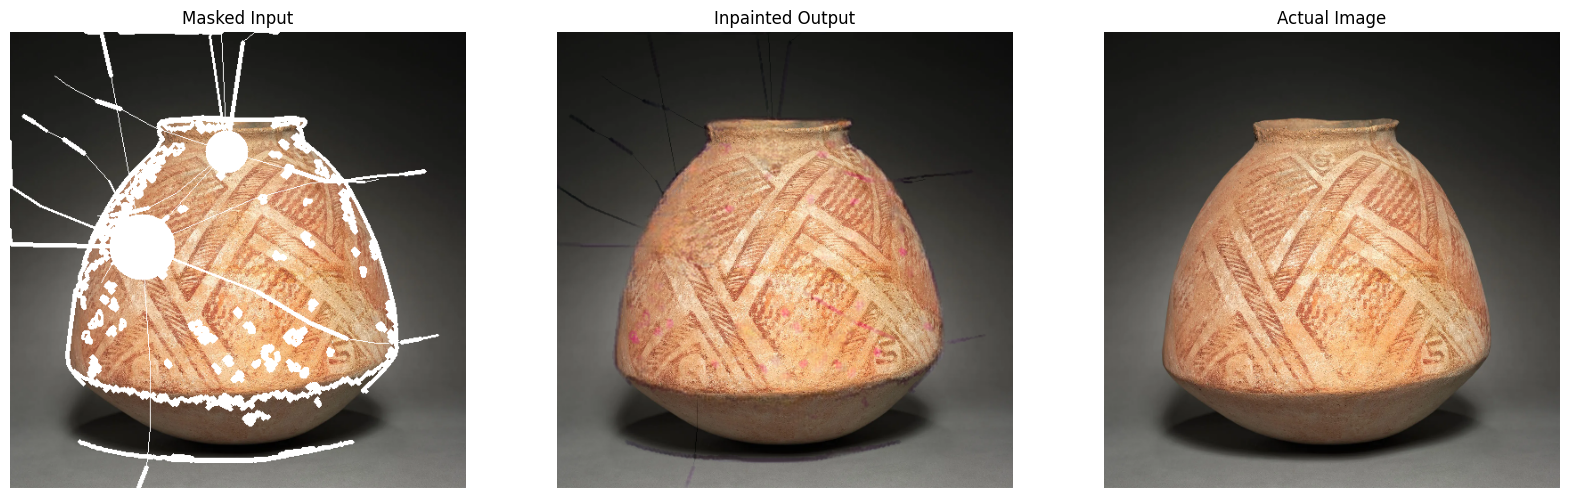

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from scipy.stats import wasserstein_distance

resize_size = (512, 512)

# Ground truth (original undamaged image)
input_image = cv2.imread("input/input_img.png")
# Model's output
output_image = cv2.imread("output/inpainted_img.png")
# Mask used for inpainting
mask_image = cv2.imread("input/mask.png", cv2.IMREAD_GRAYSCALE)

input_image = cv2.resize(input_image, (512, 512))
output_image = cv2.resize(output_image, (512, 512))
mask_image = cv2.resize(mask_image, (512, 512))

input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

# Create masked input image (this is what goes into your model)
_, binary_mask = cv2.threshold(mask_image, 1, 255, cv2.THRESH_BINARY)
masked_input = input_image.copy()
masked_input[binary_mask == 255] = [255, 255, 255]
masked_input_rgb = cv2.cvtColor(masked_input, cv2.COLOR_BGR2RGB)

# =================== CALCULATE METRICS ===================
print("=" * 50)
print("INPAINTING QUALITY METRICS")
print("=" * 50)

# Convert to different color spaces for various metrics
input_gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
output_gray = cv2.cvtColor(output_image, cv2.COLOR_BGR2GRAY)
input_lab = cv2.cvtColor(input_image, cv2.COLOR_BGR2LAB)
output_lab = cv2.cvtColor(output_image, cv2.COLOR_BGR2LAB)

# Global metrics (for the entire image)
# 1. SSIM (Structural Similarity Index)
ssim_score = ssim(input_gray, output_gray)
print(f"Global SSIM: {ssim_score:.4f} (higher is better)")

# 2. PSNR (Peak Signal-to-Noise Ratio)
psnr_score = psnr(input_image_rgb, output_image_rgb)
print(f"Global PSNR: {psnr_score:.2f} dB (higher is better)")

# 3. MSE (Mean Squared Error)
mse = np.mean((input_image_rgb.astype(np.float32) - output_image_rgb.astype(np.float32))**2)
print(f"Global MSE: {mse:.2f} (lower is better)")

# 4. L1 (Mean Absolute Error)
l1 = np.mean(np.abs(input_image_rgb.astype(np.float32) - output_image_rgb.astype(np.float32)))
print(f"Global L1: {l1:.2f} (lower is better)")

# 5. Color distance in LAB space (perceptual color difference)
color_diff = np.mean(np.sqrt(np.sum((input_lab.astype(np.float32) - output_lab.astype(np.float32))**2, axis=2)))
print(f"Color difference (LAB space): {color_diff:.2f} (lower is better)")

# 6. Histogram similarity
def calc_hist_similarity(img1, img2):
    hist1_b = cv2.calcHist([img1], [0], None, [256], [0, 256])
    hist1_g = cv2.calcHist([img1], [1], None, [256], [0, 256])
    hist1_r = cv2.calcHist([img1], [2], None, [256], [0, 256])

    hist2_b = cv2.calcHist([img2], [0], None, [256], [0, 256])
    hist2_g = cv2.calcHist([img2], [1], None, [256], [0, 256])
    hist2_r = cv2.calcHist([img2], [2], None, [256], [0, 256])

    cv2.normalize(hist1_b, hist1_b, 0, 1, cv2.NORM_MINMAX)
    cv2.normalize(hist1_g, hist1_g, 0, 1, cv2.NORM_MINMAX)
    cv2.normalize(hist1_r, hist1_r, 0, 1, cv2.NORM_MINMAX)
    cv2.normalize(hist2_b, hist2_b, 0, 1, cv2.NORM_MINMAX)
    cv2.normalize(hist2_g, hist2_g, 0, 1, cv2.NORM_MINMAX)
    cv2.normalize(hist2_r, hist2_r, 0, 1, cv2.NORM_MINMAX)

    score_b = cv2.compareHist(hist1_b, hist2_b, cv2.HISTCMP_CORREL)
    score_g = cv2.compareHist(hist1_g, hist2_g, cv2.HISTCMP_CORREL)
    score_r = cv2.compareHist(hist1_r, hist2_r, cv2.HISTCMP_CORREL)

    return (score_b + score_g + score_r) / 3.0

hist_similarity = calc_hist_similarity(input_image, output_image)
print(f"Histogram similarity: {hist_similarity:.4f} (higher is better)")

print("\n" + "=" * 50)
print("INPAINTED REGION METRICS (only damaged/restored areas)")
print("=" * 50)

# Calculate metrics only for the inpainted region
inpaint_mask = binary_mask == 255

# Only calculate if there are pixels in the mask
if np.sum(inpaint_mask) > 0:
    # 1. SSIM on masked region
    # Need to work with the full image but use the mask in the SSIM calculation
    masked_ssim = ssim(input_gray, output_gray, win_size=7, full=True)[1]
    masked_ssim_value = np.sum(masked_ssim * inpaint_mask) / np.sum(inpaint_mask)
    print(f"Inpainted region SSIM: {masked_ssim_value:.4f} (higher is better)")

    # 2. MSE on masked region
    masked_mse = np.mean(((input_image_rgb[inpaint_mask] - output_image_rgb[inpaint_mask])**2))
    print(f"Inpainted region MSE: {masked_mse:.2f} (lower is better)")

    # 3. L1 on masked region
    masked_l1 = np.mean(np.abs(input_image_rgb[inpaint_mask] - output_image_rgb[inpaint_mask]))
    print(f"Inpainted region L1: {masked_l1:.2f} (lower is better)")

    # 4. Color difference in LAB space
    masked_color_diff = np.mean(np.sqrt(np.sum((input_lab[inpaint_mask] - output_lab[inpaint_mask])**2, axis=1)))
    print(f"Inpainted region color difference: {masked_color_diff:.2f} (lower is better)")

    # 5. Pattern continuity score (specific to pottery with patterns)
    def pattern_continuity(orig_img, gen_img, mask, kernel_size=5):
        # Get texture features using Gabor filters
        # This is especially relevant for pottery with geometric patterns

        # Convert to grayscale
        if len(orig_img.shape) > 2:
            orig_gray = cv2.cvtColor(orig_img, cv2.COLOR_BGR2GRAY)
            gen_gray = cv2.cvtColor(gen_img, cv2.COLOR_BGR2GRAY)
        else:
            orig_gray = orig_img
            gen_gray = gen_img

        # Create filters at different orientations
        orientations = 8
        gabor_responses_orig = []
        gabor_responses_gen = []

        for i in range(orientations):
            theta = np.pi * i / orientations
            kernel = cv2.getGaborKernel((kernel_size, kernel_size), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)

            filtered_orig = cv2.filter2D(orig_gray, cv2.CV_8UC3, kernel)
            filtered_gen = cv2.filter2D(gen_gray, cv2.CV_8UC3, kernel)

            # Dilate mask to include border region
            kernel_dilate = np.ones((3, 3), np.uint8)
            mask_border = cv2.dilate(mask, kernel_dilate, iterations=1)

            # Get responses at the border of the inpainted region
            border_region = (mask_border > 0) & (mask == 0)

            if np.sum(border_region) > 0:
                gabor_responses_orig.append(filtered_orig[border_region])
                gabor_responses_gen.append(filtered_gen[border_region])

        # Calculate correlation between original and generated responses
        if len(gabor_responses_orig) == 0:
            return 0

        correlations = []
        for orig_resp, gen_resp in zip(gabor_responses_orig, gabor_responses_gen):
            if len(orig_resp) > 0 and len(gen_resp) > 0:
                corr = np.corrcoef(orig_resp.flatten(), gen_resp.flatten())[0, 1]
                if not np.isnan(corr):
                    correlations.append(corr)

        if len(correlations) == 0:
            return 0

        return np.mean(correlations)

    try:
        pattern_score = pattern_continuity(input_image, output_image, binary_mask)
        print(f"Pattern continuity score: {pattern_score:.4f} (higher is better)")
    except Exception as e:
        print(f"Could not calculate pattern continuity: {e}")
        pattern_score = 0

    # 6. Calculate edge coherence at the boundary of the inpainted region
    def edge_coherence(orig_img, gen_img, mask, kernel_size=3):
        # Get edges
        orig_edges = cv2.Canny(orig_img, 100, 200)
        gen_edges = cv2.Canny(gen_img, 100, 200)

        # Create a border around the mask
        kernel = np.ones((kernel_size, kernel_size), np.uint8)
        dilated_mask = cv2.dilate(mask, kernel, iterations=1)
        mask_border = dilated_mask & ~mask

        # Count matching edges at the border
        if np.sum(mask_border) == 0:
            return 0

        orig_border_edges = orig_edges & mask_border
        gen_border_edges = gen_edges & mask_border

        # Count matching pixel positions
        matching_edges = np.sum((orig_border_edges > 0) & (gen_border_edges > 0))
        total_edges = np.sum(orig_border_edges > 0)

        if total_edges == 0:
            return 0

        return matching_edges / total_edges

    edge_score = edge_coherence(input_gray, output_gray, binary_mask)
    print(f"Edge coherence score: {edge_score:.4f} (higher is better)")

    # 7. Texture consistency
    from skimage.feature import local_binary_pattern

    def texture_consistency(orig_img, gen_img, mask, radius=3, n_points=24):
        if len(orig_img.shape) > 2:
            orig_gray = cv2.cvtColor(orig_img, cv2.COLOR_BGR2GRAY)
            gen_gray = cv2.cvtColor(gen_img, cv2.COLOR_BGR2GRAY)
        else:
            orig_gray = orig_img
            gen_gray = gen_img

        # Compute LBP
        lbp_orig = local_binary_pattern(orig_gray, n_points, radius, method='uniform')
        lbp_gen = local_binary_pattern(gen_gray, n_points, radius, method='uniform')

        # Only compare the inpainted region
        lbp_orig_masked = lbp_orig[mask > 0]
        lbp_gen_masked = lbp_gen[mask > 0]

        if len(lbp_orig_masked) == 0:
            return 0

        # Calculate histograms
        n_bins = n_points + 2
        hist_orig, _ = np.histogram(lbp_orig_masked, bins=n_bins, range=(0, n_bins), density=True)
        hist_gen, _ = np.histogram(lbp_gen_masked, bins=n_bins, range=(0, n_bins), density=True)

        # Compare histograms using chi-square distance
        chi_square = 0.5 * np.sum(((hist_orig - hist_gen) ** 2) / (hist_orig + hist_gen + 1e-10))

        # Convert to a similarity score (0-1 range)
        similarity = np.exp(-chi_square)

        return similarity

    try:
        texture_score = texture_consistency(input_image, output_image, binary_mask)
        print(f"Texture consistency score: {texture_score:.4f} (higher is better)")
    except Exception as e:
        print(f"Could not calculate texture consistency: {e}")
        texture_score = 0

    print("\n" + "=" * 50)
    print("OVERALL QUALITY ASSESSMENT")
    print("=" * 50)

    # Combine metrics into an overall quality score with pottery-specific weighting
    # For pottery, pattern continuity and texture are especially important
    overall_score = (
        0.3 * masked_ssim_value +  # Structural similarity
        0.1 * min(1.0, psnr_score/50) +  # PSNR capped at 50dB
        0.2 * pattern_score +  # Pattern continuity (pottery-specific)
        0.15 * edge_score +  # Edge coherence
        0.15 * texture_score +  # Texture consistency
        0.1 * (1.0 - min(1.0, masked_color_diff/30))  # Color difference (inverse, capped)
    )

    # Quality rating
    if overall_score > 0.85:
        rating = "Excellent"
    elif overall_score > 0.7:
        rating = "Good"
    elif overall_score > 0.5:
        rating = "Fair"
    else:
        rating = "Poor"

    print(f"OVERALL INPAINTING QUALITY SCORE: {overall_score:.4f}")
    print(f"Quality Rating: {rating}")

    # Additional comparison: Improvement over masked input
    # This measures how much better the inpainted result is compared to just the masked input
    masked_input_mse = np.mean(((input_image_rgb[inpaint_mask] - masked_input_rgb[inpaint_mask])**2))
    output_mse = np.mean(((input_image_rgb[inpaint_mask] - output_image_rgb[inpaint_mask])**2))

    if masked_input_mse > 0:
        improvement = (masked_input_mse - output_mse) / masked_input_mse * 100
        print(f"Improvement over masked input: {improvement:.2f}%")
else:
    print("No pixels in inpainted region mask - cannot calculate region-specific metrics")

# =================== DISPLAY IMAGES ===================
f, axarr = plt.subplots(1, 3, figsize=(20, 15))
axarr[0].imshow(cv2.resize(masked_input_rgb, resize_size))
axarr[0].title.set_text('Masked Input')
axarr[0].axis('off')

axarr[1].imshow(cv2.resize(output_image_rgb, resize_size))
axarr[1].title.set_text('Inpainted Output')
axarr[1].axis('off')

axarr[2].imshow(cv2.resize(input_image_rgb, resize_size))
axarr[2].title.set_text('Actual Image')
axarr[2].axis('off')

plt.show()

INPAINTING QUALITY METRICS
Global SSIM: 0.9215 (higher is better)
Global PSNR: 30.93 dB (higher is better)
Global MSE: 52.48 (lower is better)
Global L1: 1.84 (lower is better)
Color difference (LAB space): 2.16 (lower is better)
Histogram similarity: 0.9988 (higher is better)

INPAINTED REGION METRICS (only damaged/restored areas)
Inpainted region SSIM: 0.5392 (higher is better)
Inpainted region MSE: 80.74 (lower is better)
Inpainted region L1: 85.60 (lower is better)
Inpainted region color difference: 10.55 (lower is better)
Pattern continuity score: 0.0000 (higher is better)
Edge coherence score: 0.6262 (higher is better)
Texture consistency score: 0.9835 (higher is better)

OVERALL QUALITY ASSESSMENT
OVERALL INPAINTING QUALITY SCORE: 0.5299
Quality Rating: Fair
Improvement over masked input: 24.81%


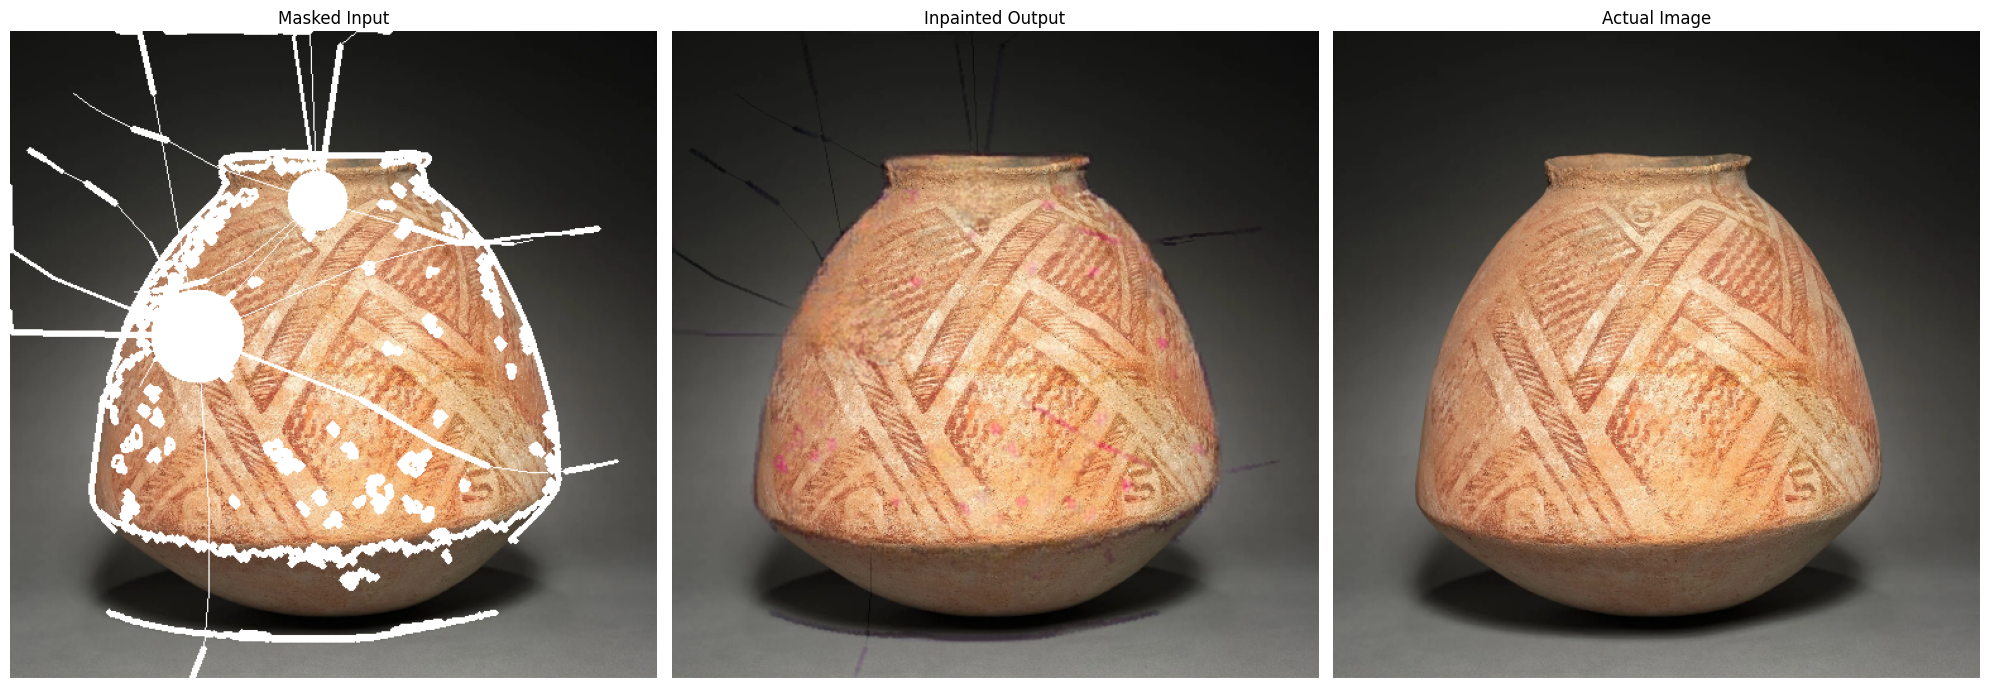

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from scipy.stats import wasserstein_distance

resize_size = (512, 512)

# Ground truth (original undamaged image)
input_image = cv2.imread("input/input_img.png")
# Model's output
output_image = cv2.imread("output/inpainted_img.png")
# Mask used for inpainting
mask_image = cv2.imread("input/mask.png", cv2.IMREAD_GRAYSCALE)

input_image = cv2.resize(input_image, (512, 512))
output_image = cv2.resize(output_image, (512, 512))
mask_image = cv2.resize(mask_image, (512, 512))

input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

# Create masked input image (this is what goes into your model)
_, binary_mask = cv2.threshold(mask_image, 1, 255, cv2.THRESH_BINARY)
masked_input = input_image.copy()
masked_input[binary_mask == 255] = [255, 255, 255]
masked_input_rgb = cv2.cvtColor(masked_input, cv2.COLOR_BGR2RGB)

# =================== CALCULATE METRICS ===================
print("=" * 50)
print("INPAINTING QUALITY METRICS")
print("=" * 50)

# Convert to different color spaces for various metrics
input_gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
output_gray = cv2.cvtColor(output_image, cv2.COLOR_BGR2GRAY)
input_lab = cv2.cvtColor(input_image, cv2.COLOR_BGR2LAB)
output_lab = cv2.cvtColor(output_image, cv2.COLOR_BGR2LAB)

# Global metrics (for the entire image)
# 1. SSIM (Structural Similarity Index)
ssim_score = ssim(input_gray, output_gray)
print(f"Global SSIM: {ssim_score:.4f} (higher is better)")

# 2. PSNR (Peak Signal-to-Noise Ratio)
psnr_score = psnr(input_image_rgb, output_image_rgb)
print(f"Global PSNR: {psnr_score:.2f} dB (higher is better)")

# 3. MSE (Mean Squared Error)
mse = np.mean((input_image_rgb.astype(np.float32) - output_image_rgb.astype(np.float32))**2)
print(f"Global MSE: {mse:.2f} (lower is better)")

# 4. L1 (Mean Absolute Error)
l1 = np.mean(np.abs(input_image_rgb.astype(np.float32) - output_image_rgb.astype(np.float32)))
print(f"Global L1: {l1:.2f} (lower is better)")

# 5. Color distance in LAB space (perceptual color difference)
color_diff = np.mean(np.sqrt(np.sum((input_lab.astype(np.float32) - output_lab.astype(np.float32))**2, axis=2)))
print(f"Color difference (LAB space): {color_diff:.2f} (lower is better)")

# 6. Histogram similarity
def calc_hist_similarity(img1, img2):
    hist1_b = cv2.calcHist([img1], [0], None, [256], [0, 256])
    hist1_g = cv2.calcHist([img1], [1], None, [256], [0, 256])
    hist1_r = cv2.calcHist([img1], [2], None, [256], [0, 256])

    hist2_b = cv2.calcHist([img2], [0], None, [256], [0, 256])
    hist2_g = cv2.calcHist([img2], [1], None, [256], [0, 256])
    hist2_r = cv2.calcHist([img2], [2], None, [256], [0, 256])

    cv2.normalize(hist1_b, hist1_b, 0, 1, cv2.NORM_MINMAX)
    cv2.normalize(hist1_g, hist1_g, 0, 1, cv2.NORM_MINMAX)
    cv2.normalize(hist1_r, hist1_r, 0, 1, cv2.NORM_MINMAX)
    cv2.normalize(hist2_b, hist2_b, 0, 1, cv2.NORM_MINMAX)
    cv2.normalize(hist2_g, hist2_g, 0, 1, cv2.NORM_MINMAX)
    cv2.normalize(hist2_r, hist2_r, 0, 1, cv2.NORM_MINMAX)

    score_b = cv2.compareHist(hist1_b, hist2_b, cv2.HISTCMP_CORREL)
    score_g = cv2.compareHist(hist1_g, hist2_g, cv2.HISTCMP_CORREL)
    score_r = cv2.compareHist(hist1_r, hist2_r, cv2.HISTCMP_CORREL)

    return (score_b + score_g + score_r) / 3.0

hist_similarity = calc_hist_similarity(input_image, output_image)
print(f"Histogram similarity: {hist_similarity:.4f} (higher is better)")

print("\n" + "=" * 50)
print("INPAINTED REGION METRICS (only damaged/restored areas)")
print("=" * 50)

# Calculate metrics only for the inpainted region
inpaint_mask = binary_mask == 255

# Only calculate if there are pixels in the mask
if np.sum(inpaint_mask) > 0:
    # 1. SSIM on masked region
    # Need to work with the full image but use the mask in the SSIM calculation
    masked_ssim = ssim(input_gray, output_gray, win_size=7, full=True)[1]
    masked_ssim_value = np.sum(masked_ssim * inpaint_mask) / np.sum(inpaint_mask)
    print(f"Inpainted region SSIM: {masked_ssim_value:.4f} (higher is better)")

    # 2. MSE on masked region
    masked_mse = np.mean(((input_image_rgb[inpaint_mask] - output_image_rgb[inpaint_mask])**2))
    print(f"Inpainted region MSE: {masked_mse:.2f} (lower is better)")

    # 3. L1 on masked region
    masked_l1 = np.mean(np.abs(input_image_rgb[inpaint_mask] - output_image_rgb[inpaint_mask]))
    print(f"Inpainted region L1: {masked_l1:.2f} (lower is better)")

    # 4. Color difference in LAB space
    masked_color_diff = np.mean(np.sqrt(np.sum((input_lab[inpaint_mask] - output_lab[inpaint_mask])**2, axis=1)))
    print(f"Inpainted region color difference: {masked_color_diff:.2f} (lower is better)")

    # 5. Pattern continuity score (specific to pottery with patterns)
    def pattern_continuity(orig_img, gen_img, mask, kernel_size=5):
        # Get texture features using Gabor filters
        # This is especially relevant for pottery with geometric patterns

        # Convert to grayscale
        if len(orig_img.shape) > 2:
            orig_gray = cv2.cvtColor(orig_img, cv2.COLOR_BGR2GRAY)
            gen_gray = cv2.cvtColor(gen_img, cv2.COLOR_BGR2GRAY)
        else:
            orig_gray = orig_img
            gen_gray = gen_img

        # Create filters at different orientations
        orientations = 8
        gabor_responses_orig = []
        gabor_responses_gen = []

        for i in range(orientations):
            theta = np.pi * i / orientations
            kernel = cv2.getGaborKernel((kernel_size, kernel_size), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)

            filtered_orig = cv2.filter2D(orig_gray, cv2.CV_8UC3, kernel)
            filtered_gen = cv2.filter2D(gen_gray, cv2.CV_8UC3, kernel)

            # Dilate mask to include border region
            kernel_dilate = np.ones((3, 3), np.uint8)
            mask_border = cv2.dilate(mask, kernel_dilate, iterations=1)

            # Get responses at the border of the inpainted region
            border_region = (mask_border > 0) & (mask == 0)

            if np.sum(border_region) > 0:
                gabor_responses_orig.append(filtered_orig[border_region])
                gabor_responses_gen.append(filtered_gen[border_region])

        # Calculate correlation between original and generated responses
        if len(gabor_responses_orig) == 0:
            return 0

        correlations = []
        for orig_resp, gen_resp in zip(gabor_responses_orig, gabor_responses_gen):
            if len(orig_resp) > 0 and len(gen_resp) > 0:
                # Fix: Check for zero standard deviation to avoid division by zero
                std_orig = np.std(orig_resp.flatten())
                std_gen = np.std(gen_resp.flatten())
                
                if std_orig > 1e-10 and std_gen > 1e-10:  # Only calculate if both have non-zero std
                    corr = np.corrcoef(orig_resp.flatten(), gen_resp.flatten())[0, 1]
                    if not np.isnan(corr):
                        correlations.append(corr)

        if len(correlations) == 0:
            return 0

        return np.mean(correlations)

    try:
        pattern_score = pattern_continuity(input_image, output_image, binary_mask)
        print(f"Pattern continuity score: {pattern_score:.4f} (higher is better)")
    except Exception as e:
        print(f"Could not calculate pattern continuity: {e}")
        pattern_score = 0

    # 6. Calculate edge coherence at the boundary of the inpainted region
    def edge_coherence(orig_img, gen_img, mask, kernel_size=3):
        # Get edges
        orig_edges = cv2.Canny(orig_img, 100, 200)
        gen_edges = cv2.Canny(gen_img, 100, 200)

        # Create a border around the mask
        kernel = np.ones((kernel_size, kernel_size), np.uint8)
        dilated_mask = cv2.dilate(mask, kernel, iterations=1)
        mask_border = dilated_mask & ~mask

        # Count matching edges at the border
        if np.sum(mask_border) == 0:
            return 0

        orig_border_edges = orig_edges & mask_border
        gen_border_edges = gen_edges & mask_border

        # Count matching pixel positions
        matching_edges = np.sum((orig_border_edges > 0) & (gen_border_edges > 0))
        total_edges = np.sum(orig_border_edges > 0)

        if total_edges == 0:
            return 0

        return matching_edges / total_edges

    edge_score = edge_coherence(input_gray, output_gray, binary_mask)
    print(f"Edge coherence score: {edge_score:.4f} (higher is better)")

    # 7. Texture consistency
    from skimage.feature import local_binary_pattern

    def texture_consistency(orig_img, gen_img, mask, radius=3, n_points=24):
        if len(orig_img.shape) > 2:
            orig_gray = cv2.cvtColor(orig_img, cv2.COLOR_BGR2GRAY)
            gen_gray = cv2.cvtColor(gen_img, cv2.COLOR_BGR2GRAY)
        else:
            orig_gray = orig_img
            gen_gray = gen_img

        # Compute LBP
        lbp_orig = local_binary_pattern(orig_gray, n_points, radius, method='uniform')
        lbp_gen = local_binary_pattern(gen_gray, n_points, radius, method='uniform')

        # Only compare the inpainted region
        lbp_orig_masked = lbp_orig[mask > 0]
        lbp_gen_masked = lbp_gen[mask > 0]

        if len(lbp_orig_masked) == 0:
            return 0

        # Calculate histograms
        n_bins = n_points + 2
        hist_orig, _ = np.histogram(lbp_orig_masked, bins=n_bins, range=(0, n_bins), density=True)
        hist_gen, _ = np.histogram(lbp_gen_masked, bins=n_bins, range=(0, n_bins), density=True)

        # Fix: Handle zero values in histograms to avoid division by zero
        denominator = hist_orig + hist_gen + 1e-10
        chi_square = 0.5 * np.sum(((hist_orig - hist_gen) ** 2) / denominator)

        # Convert to a similarity score (0-1 range)
        similarity = np.exp(-chi_square)

        return similarity

    try:
        texture_score = texture_consistency(input_image, output_image, binary_mask)
        print(f"Texture consistency score: {texture_score:.4f} (higher is better)")
    except Exception as e:
        print(f"Could not calculate texture consistency: {e}")
        texture_score = 0

    print("\n" + "=" * 50)
    print("OVERALL QUALITY ASSESSMENT")
    print("=" * 50)

    # Combine metrics into an overall quality score with pottery-specific weighting
    # For pottery, pattern continuity and texture are especially important
    overall_score = (
        0.3 * masked_ssim_value +  # Structural similarity
        0.1 * min(1.0, psnr_score/50) +  # PSNR capped at 50dB
        0.2 * pattern_score +  # Pattern continuity (pottery-specific)
        0.15 * edge_score +  # Edge coherence
        0.15 * texture_score +  # Texture consistency
        0.1 * (1.0 - min(1.0, masked_color_diff/30))  # Color difference (inverse, capped)
    )

    # Quality rating
    if overall_score > 0.85:
        rating = "Excellent"
    elif overall_score > 0.7:
        rating = "Good"
    elif overall_score > 0.5:
        rating = "Fair"
    else:
        rating = "Poor"

    print(f"OVERALL INPAINTING QUALITY SCORE: {overall_score:.4f}")
    print(f"Quality Rating: {rating}")

    # Additional comparison: Improvement over masked input
    # This measures how much better the inpainted result is compared to just the masked input
    masked_input_mse = np.mean(((input_image_rgb[inpaint_mask] - masked_input_rgb[inpaint_mask])**2))
    output_mse = np.mean(((input_image_rgb[inpaint_mask] - output_image_rgb[inpaint_mask])**2))

    if masked_input_mse > 0:
        improvement = (masked_input_mse - output_mse) / masked_input_mse * 100
        print(f"Improvement over masked input: {improvement:.2f}%")
else:
    print("No pixels in inpainted region mask - cannot calculate region-specific metrics")

# =================== DISPLAY IMAGES ===================
f, axarr = plt.subplots(1, 3, figsize=(20, 15))
axarr[0].imshow(cv2.resize(masked_input_rgb, resize_size))
axarr[0].set_title('Masked Input')
axarr[0].axis('off')

axarr[1].imshow(cv2.resize(output_image_rgb, resize_size))
axarr[1].set_title('Inpainted Output')
axarr[1].axis('off')

axarr[2].imshow(cv2.resize(input_image_rgb, resize_size))
axarr[2].set_title('Actual Image')
axarr[2].axis('off')

plt.tight_layout()
plt.show()